# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

# Importing The Dataset

In [2]:
data = pd.read_csv('car_age_price.csv')

In [3]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [4]:
data.shape

(112, 2)

# Exploratory Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

In [7]:
data.Year.value_counts()

2017    47
2015    22
2019    12
2018    11
2016     6
2014     6
2020     4
2013     4
Name: Year, dtype: int64

# Data Visualization

<Axes: xlabel='Year', ylabel='Price'>

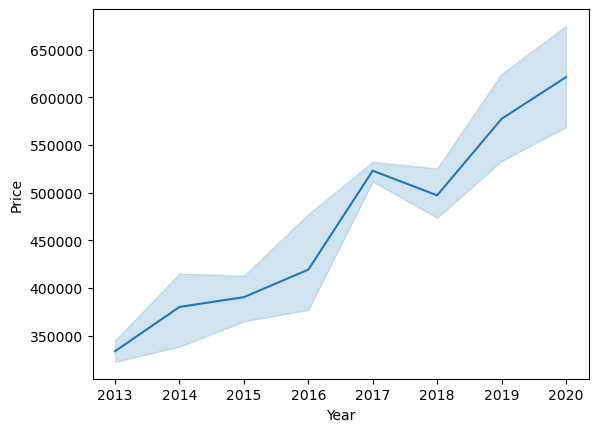

In [8]:
import seaborn as sns
sns.lineplot(x='Year',y='Price',data=data)

<Axes: xlabel='Year', ylabel='Price'>

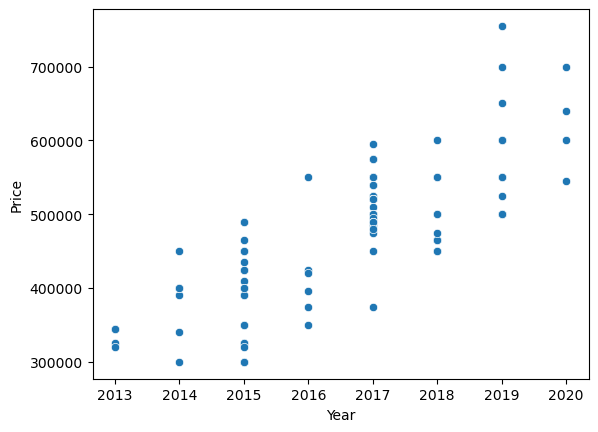

In [9]:
sns.scatterplot(x='Year',y='Price',data=data)

# Split the dataset into X and y

In [10]:
X=data['Year']
y=data['Price']

In [11]:
X = np.array(X)
y = np.array(y)

In [12]:
y = y.reshape(-1,1)
y.shape
X = X.reshape(-1,1)
X.shape

(112, 1)

# Training and Testing

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state= 42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(78, 1) (34, 1) (78, 1) (34, 1)


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred=model.predict(X_test)

In [16]:
y_pred

array([[598895.38633195],
       [505711.87168759],
       [552303.62900977],
       [552303.62900977],
       [552303.62900977],
       [412528.35704324],
       [505711.87168759],
       [552303.62900977],
       [598895.38633195],
       [598895.38633195],
       [319344.8423989 ],
       [505711.87168759],
       [412528.35704324],
       [645487.14365412],
       [552303.62900977],
       [598895.38633195],
       [319344.8423989 ],
       [412528.35704324],
       [505711.87168759],
       [505711.87168759],
       [505711.87168759],
       [505711.87168759],
       [505711.87168759],
       [505711.87168759],
       [505711.87168759],
       [505711.87168759],
       [412528.35704324],
       [412528.35704324],
       [365936.59972107],
       [412528.35704324],
       [505711.87168759],
       [598895.38633195],
       [552303.62900977],
       [505711.87168759]])

In [17]:
y_test

array([[525000],
       [495000],
       [465000],
       [450000],
       [550000],
       [300000],
       [550000],
       [500000],
       [500000],
       [550000],
       [320000],
       [550000],
       [465000],
       [640000],
       [465000],
       [500000],
       [345000],
       [390000],
       [375000],
       [520000],
       [550000],
       [500000],
       [550000],
       [525000],
       [520000],
       [540000],
       [434999],
       [320000],
       [390000],
       [325000],
       [500000],
       [650000],
       [450000],
       [575000]], dtype=int64)

# Model Evaluation

In [18]:
from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:',mae)


from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:' ,mse)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('RMSE:', rmse)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print('R^2 Score:', r2)

Mean Absolute Error: 50966.62199524177
Mean Squared Error: 3962573261.894448
RMSE: 62948.97347768625
R^2 Score: 0.4887760028600123


In [19]:
# Extract coefficients #y =mx+c
slope = model.coef_[0] 
intercept = model.intercept_

# Display intercepts
print(f'Slope: {slope}')
print(f'Y-Intercept: {intercept}')

Slope: [46591.75732218]
Y-Intercept: [-93469862.64714085]


In [20]:
X=2022
y=slope*X+intercept
print(y)
print('The possible price of 2022 model will be',y)

[738670.65829848]
The possible price of 2022 model will be [738670.65829848]


# Linear relationship between year and price

In [21]:
import matplotlib.pyplot as plt

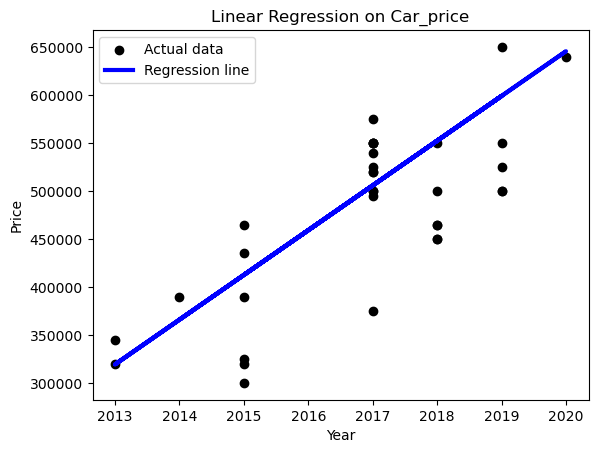

In [22]:
# Plot the original data and the regression line
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression line')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Linear Regression on Car_price')
plt.legend()
plt.show()

# Lasso Regression

In [23]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [24]:
X_pred_lasso_test = lasso.predict(X_test)
r2_score(y_test, X_pred_lasso_test)

0.4887790451498477

the accuracy of linear and lasso is same